In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline # to display graphs so we don't have to write plt.show()

In [4]:
df = pd.read_csv('/content/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [6]:
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [7]:
# Selecting relevant columns
df = df[['daily', 'sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [9]:
df.info() # checking for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   daily   34 non-null     float64
 1   sunday  34 non-null     float64
dtypes: float64(2)
memory usage: 676.0 bytes


,0
daily,0
sunday,0


## Correlation Analysis

<Axes: xlabel='daily', ylabel='sunday'>

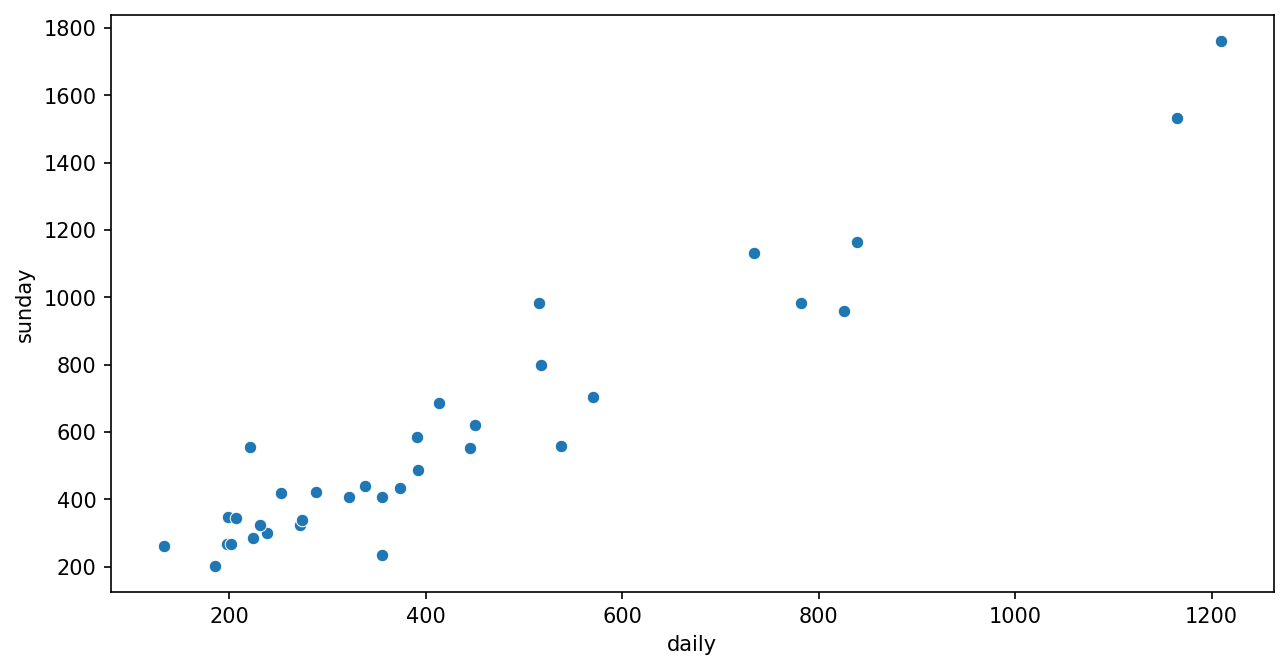

In [10]:
# Scatter plot : It shows the relationship between the variables
#sns.scatterplot(x='daily', y='sunday', data=df)
sns.scatterplot(x=df['daily'], y=df['sunday'])

In [11]:
# Correlation matrix : It shows the correlation between the variables
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

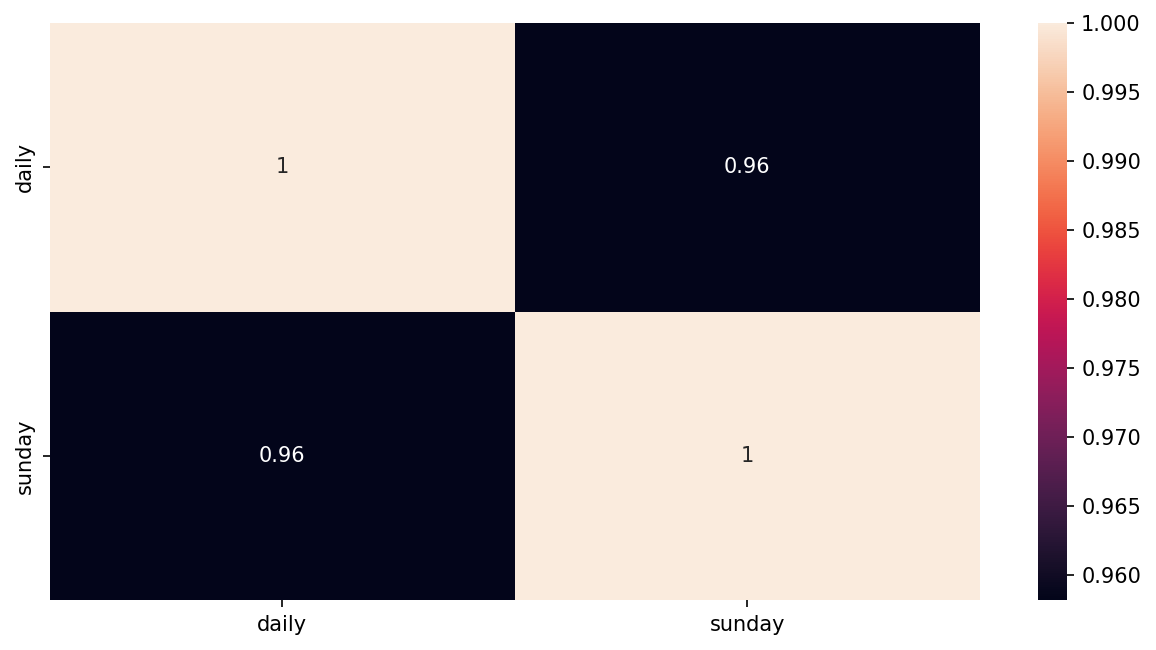

In [12]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='daily', ylabel='Density'>

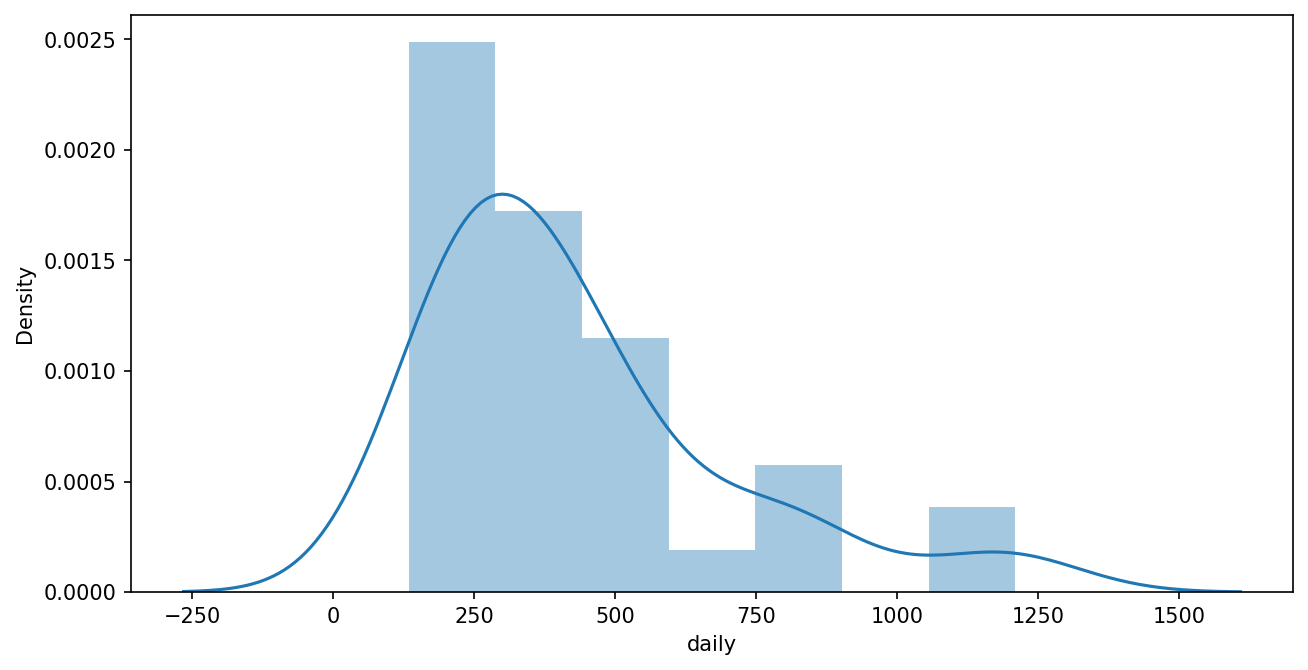

In [13]:
sns.distplot(df['daily']) # distribution/density plot - positive skewness in the data

<Axes: xlabel='sunday', ylabel='Density'>

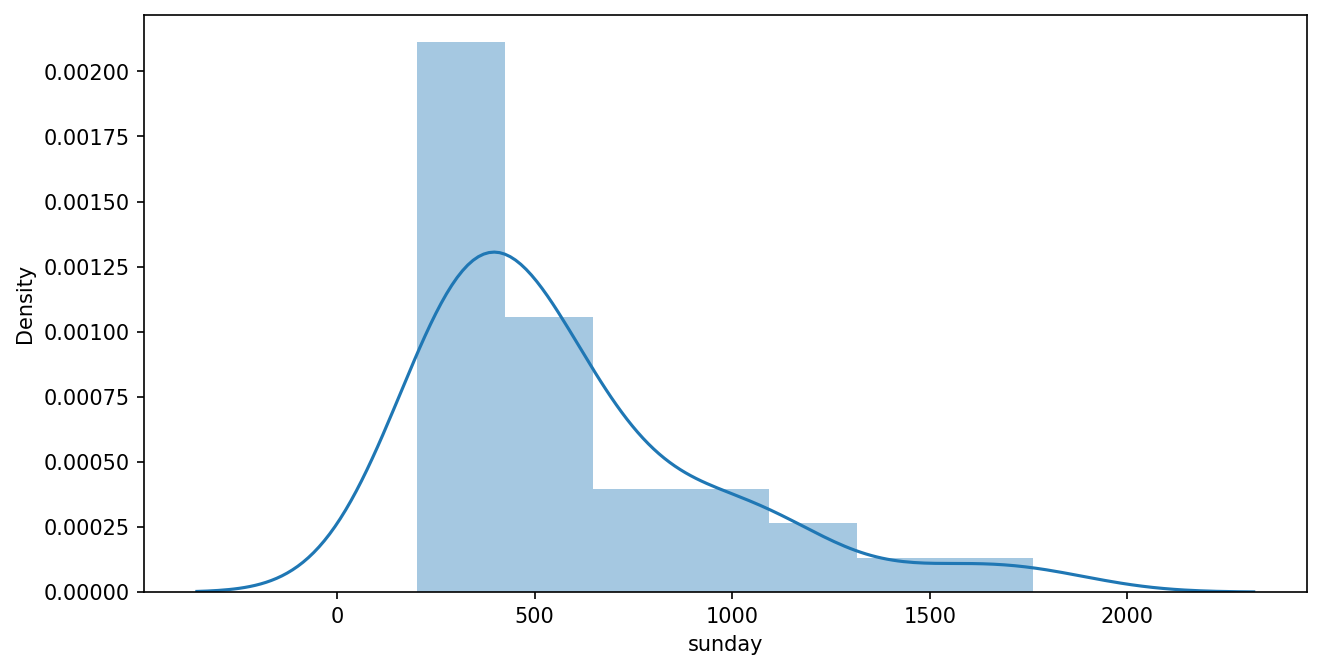

In [14]:
sns.distplot(df['sunday']) # distribution/density plot - positive skewness in the data

### Fitting a Linear Regression Model

In [16]:
import statsmodels.formula.api as smf # model building
# model - Regression model, "Y~X", OR "Dependent_variable~Independent_Variable"
model = smf.ols('sunday~daily', data=df).fit() # ols = ordinary least square = linear regression model
# fit() = to fit the model to the data/ to find the best fit regression line
#model.summary() # summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 23 Aug 2025   Prob (F-statistic):           6.02e-19
Time:                        10:49:54   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Coefficients of the model (Bita values: B0, B1)
model.params
# Reg. Equn: Sunday = B0+B1*daily
# In output: Intercept(i.e. best fit line is intersecting y axis at 13.83) - B0, daily - coefficient of daily i.e.B1
# Sunday = 13.83 + 1.33 * daily
# we assumed daily circulation as 200
# So Sunday = 13.83 + 1.33 * 200

,0
Intercept,13.835630
daily,1.339715


In [18]:
Sunday = 13.83 + 1.33 * 200
Sunday

279.83

In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)
# we have estimates: B0=13.8, B1=1.33. We have t-value 0.38 and 18.93, p-value - 0.7, 6.01 is approx.= 0
#focus on B1. B1 is slope. Define H0 and H1. H0: B1=0 i.e. No effect of x on y, Ha: B1!=0 i.e. There exists significant effect of x on y.
# Here P < Alfa so reject H0 and accept Ha which means Daily variable has significant effect on Sunday variable.

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [20]:
#R squared values - 0.92 - Good reg. equn.
(model.rsquared,model.rsquared_adj)

(np.float64(0.9180596895873295), np.float64(0.9154990548869336))

<Axes: xlabel='daily', ylabel='sunday'>

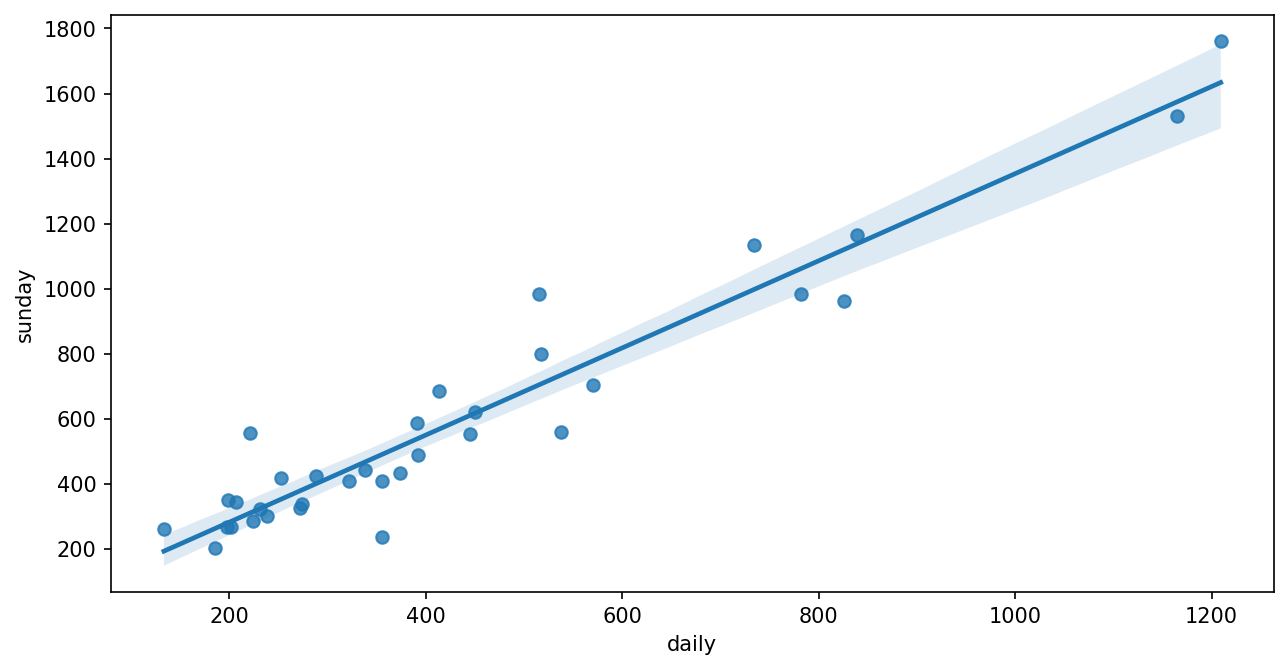

In [21]:
sns.regplot(x="daily", y="sunday", data=df)

In [22]:
#1100 manual calculation
(1.3*1100)+13.835630

1443.83563

In [ ]:
#Predicte value for 150, 240

### Predict for new data point

In [23]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300]) # x value is (daily circulation) 200 at one branch and 300 at another branch

In [26]:
newdata

,0
0,200
1,300


In [28]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [29]:
model.predict(data_pred) # model - regression model

,0
0,281.778581
1,415.750057


### **Data Transformation**


1.   Square Root
2.   Log



**Log Transformation**

In [30]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [31]:
# To overcome the effect of outliers perform transformations. Skewed Histogram will become approximately equal to normal
# Log of every column can be taken. It doesn't change the pattern/information in data but changes values to different scales.
df['log_daily'] = np.log(df['daily'])
df

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450
5,733.775,1133.249,6.598202
6,198.832,348.744,5.292460
7,252.624,417.779,5.531902
8,206.204,344.522,5.328866
9,231.177,323.084,5.443184


In [32]:
df['log_sunday'] = np.log(df['sunday'])
df

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316
5,733.775,1133.249,6.598202,7.032844
6,198.832,348.744,5.292460,5.854338
7,252.624,417.779,5.531902,6.034953
8,206.204,344.522,5.328866,5.842158
9,231.177,323.084,5.443184,5.777912


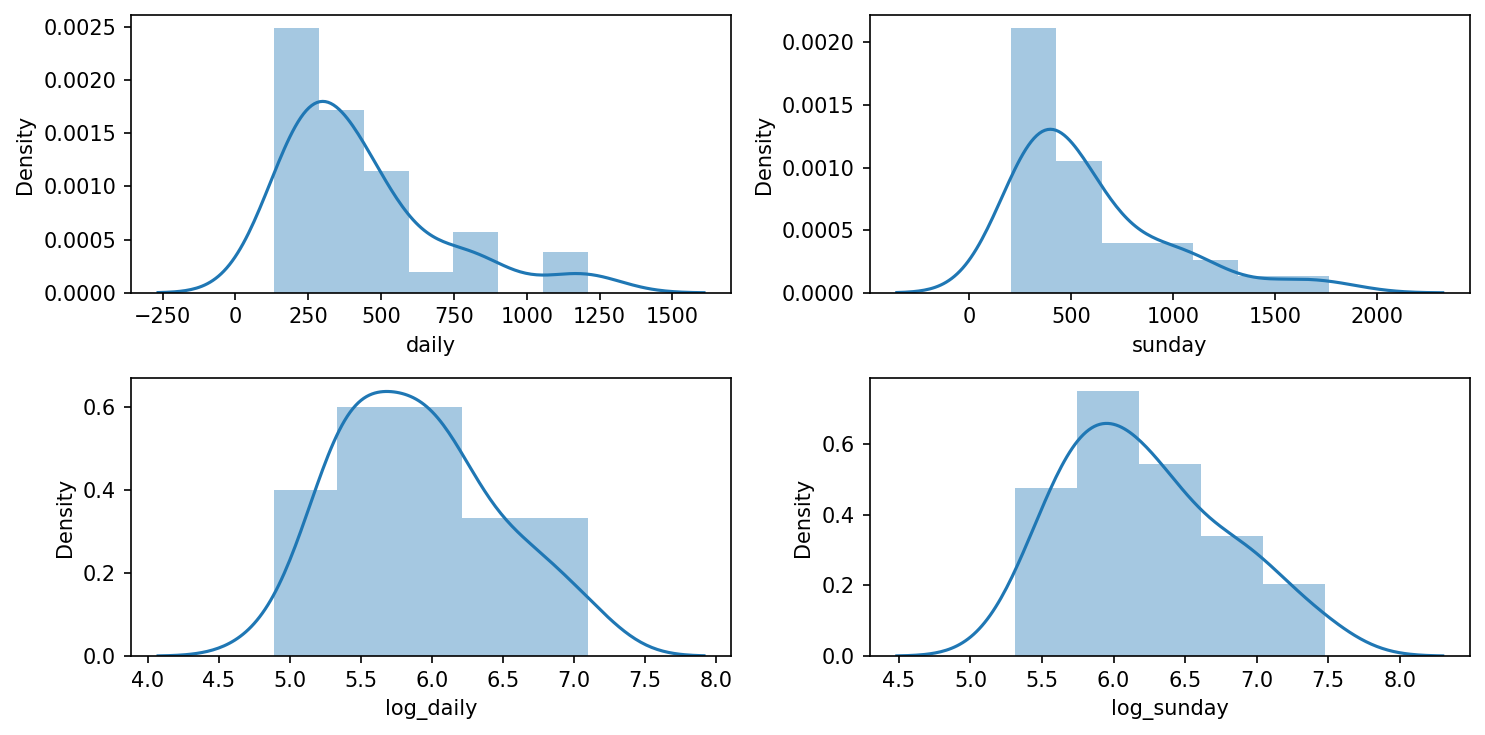

In [33]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['log_daily'])

plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])

plt.tight_layout()
# as compared to previous graphs, skewness is reduced.

In [34]:
df['log_daily'].skew(), df['log_sunday'].skew() # moderate skewness is there
# To remove all skewness we have to remove all outliers from data

(np.float64(0.4682202000020356), np.float64(0.5337572087816101))

In [35]:
df['daily'].skew(), df['sunday'].skew() # High skewness.

(np.float64(1.5321591323040094), np.float64(1.5644730738925112))

**Square Root Transformation**

In [36]:
df['sqrt_daily'] = np.sqrt(df['daily'])
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df

,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,15.204506,17.974538


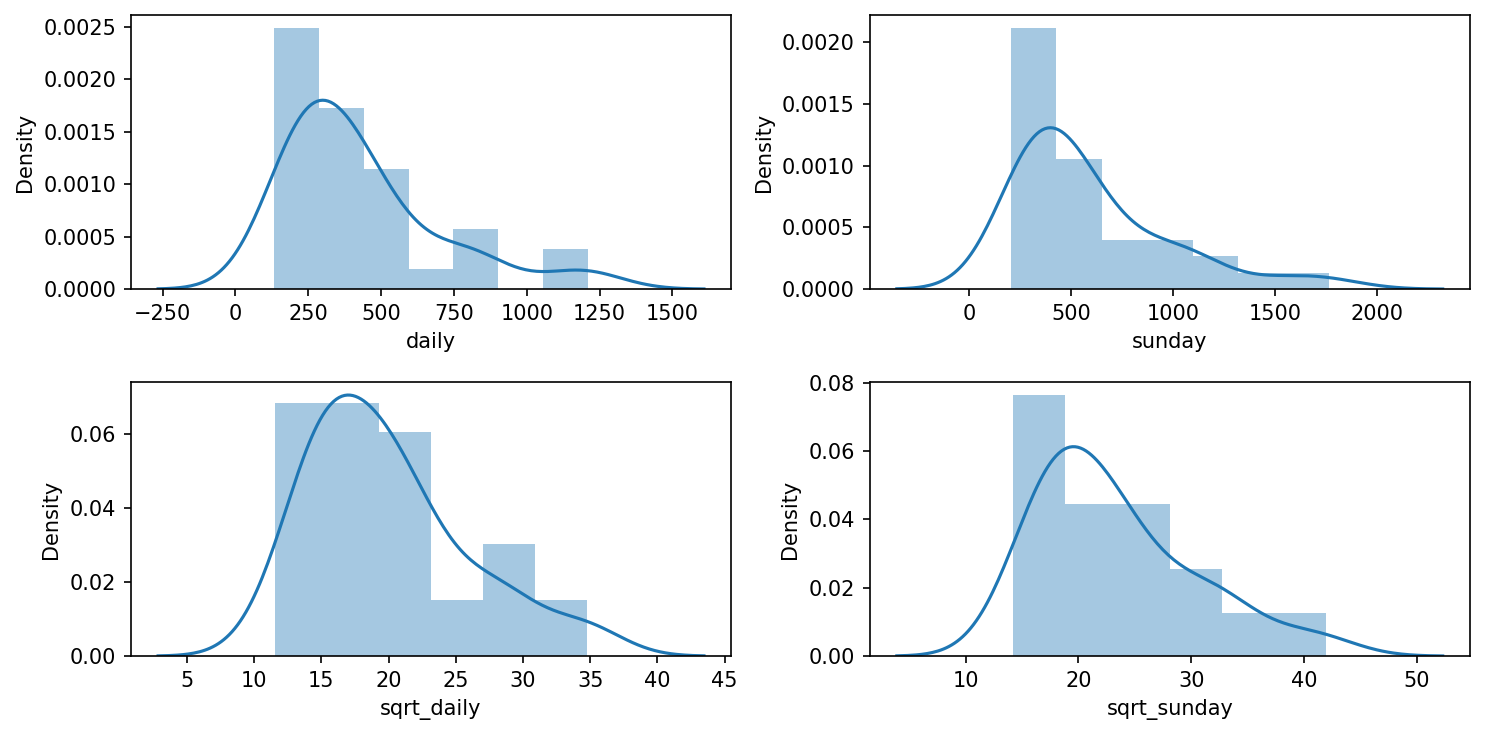

In [37]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])

plt.subplot(2,2,2)
sns.distplot(df['sunday'])

plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])

plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])

plt.tight_layout()

In [38]:
df['sqrt_daily'].skew(), df['sqrt_sunday'].skew()

(np.float64(1.0075247084922163), np.float64(1.0392935145699538))